## Problema 1 Tarea 6 Modelos Estadisticos##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


##############
# PROBLEMA 1 #
##############

# inciso a)
dataP1=pd.read_csv('DatosP1T6.csv')
X=np.column_stack([dataP1['V1'],dataP1['V2'],dataP1['V3'],dataP1['V4'],dataP1['V5']]) # Variables independiente
# Matriz de correlaciones
X_means=np.mean(X,axis=0)
X_center=X-X_means
X_norms=np.linalg.norm(X_center,axis=0)
X_cor = X_center/X_norms

W=dataP1['W'].to_numpy() # Variable respuesta
W_center=(W-np.mean(W))
W_cor=W_center/np.linalg.norm(W_center)



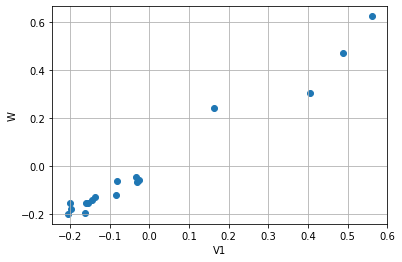

In [2]:
# Diagramas de dispersion

# variable W vs V1
plt.scatter(X_cor[:,0],W_cor)
plt.xlabel('V1')
plt.ylabel('W')
plt.grid(True)
plt.show()


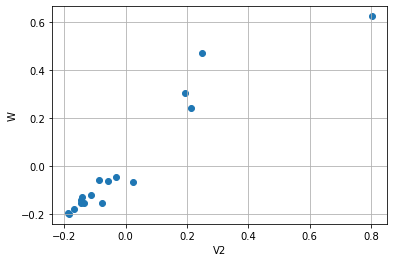

In [3]:
# variable W vs V2

plt.scatter(X_cor[:,1],W_cor)
plt.xlabel('V2')
plt.ylabel('W')
plt.grid(True)
plt.show()


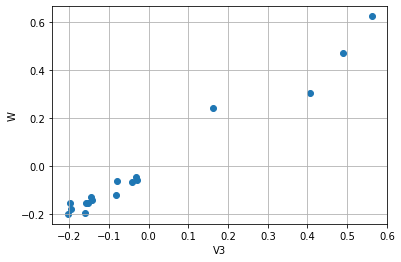

In [4]:
# variable W vs V3

plt.scatter(X_cor[:,2],W_cor)
plt.xlabel('V3')
plt.ylabel('W')
plt.grid(True)
plt.show()


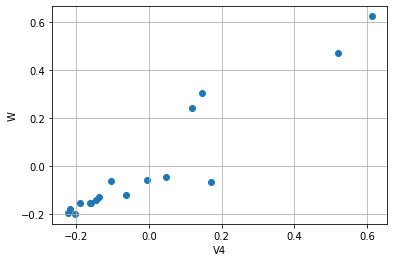

In [5]:
# variable W vs V4

plt.scatter(X_cor[:,3],W_cor)
plt.xlabel('V4')
plt.ylabel('W')
plt.grid(True)
plt.show()


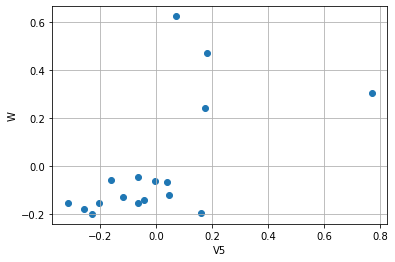

In [6]:
# variable W vs V5

plt.scatter(X_cor[:,4],W_cor)
plt.xlabel('V5')
plt.ylabel('W')
plt.grid(True)
plt.show()

In [7]:
# Calculo de las correlaciones
print("Correlaciones con la variable respuesta")
print("\n Cor(W,V1): %f" %(np.dot(X_cor[:,0],W_cor)))
print("\n Cor(W,V2): %f" %(np.dot(X_cor[:,1],W_cor)))
print("\n Cor(W,V3): %f" %(np.dot(X_cor[:,2],W_cor)))
print("\n Cor(W,V4): %f" %(np.dot(X_cor[:,3],W_cor)))
print("\n Cor(W,V5): %f" %(np.dot(X_cor[:,4],W_cor)))

Correlaciones con la variable respuesta

 Cor(W,V1): 0.985646

 Cor(W,V2): 0.945173

 Cor(W,V3): 0.985992

 Cor(W,V4): 0.940356

 Cor(W,V5): 0.578580


In [8]:
# inciso b) y c)

Z=X_cor.T@X_cor
invZ=np.linalg.inv(Z)

np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)

print('Matriz de correlaciones:')
print(Z)
eigs = np.linalg.eigvals(Z)
condition_number = np.sqrt(eigs.max() / eigs.min())
print('\nNumero de condicion:')
print(condition_number)
print('\nFactores de inflación de la varianza')
print(np.diag(invZ))




Matriz de correlaciones:
[[1.      0.90738 0.9999  0.93569 0.6712 ]
 [0.90738 1.      0.90715 0.91047 0.44665]
 [0.9999  0.90715 1.      0.93317 0.67111]
 [0.93569 0.91047 0.93317 1.      0.46286]
 [0.6712  0.44665 0.67111 0.46286 1.     ]]

Numero de condicion:
278.87212383682476

Factores de inflación de la varianza
[9597.57076    7.94059 8933.0865    23.29386    4.27984]


### Podemos observar que las variables [V1,V2,V3,V4] están fuerte correlacionadas entre ellas, luego deberíamos elegir una de estas variables y probar el modelo incluyendo [V5], la comparación la hacemos fijándonos en el $R^2$ y el $AIC$ ###

In [9]:
# inciso e) (Validación de los modelos propuestos, con los datos centrados y con columnas de norma 1)
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

Xmodel1=np.column_stack([X_cor[:,2],X_cor[:,4]])



In [10]:
#############
# MODELO P1 # 
#############
Zmodel1P1=Xmodel1.T@ Xmodel1
invZmodel1P1=np.linalg.inv(Zmodel1P1)
eigsModelP1=np.linalg.eigvals(Zmodel1P1)


print('Matriz de correlacion:')
print(Zmodel1P1)
print('\nFactores de inflacion:')
print(np.diag(invZmodel1P1))
print('\nValores propios:')
print(eigsModelP1)
print('\nNumero de condicion:')
print(eigsModelP1.max()/eigsModelP1.min())


model1=sm.OLS(W_cor,Xmodel1).fit() # como en el Seber pag. 71
model1.summary2()
 

Matriz de correlacion:
[[1.      0.67111]
 [0.67111 1.     ]]

Factores de inflacion:
[1.81947 1.81947]

Valores propios:
[1.67111 0.32889]

Numero de condicion:
5.081051888629156


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.983    
Dependent Variable:     y                AIC:                         -67.0398 
Date:                   2021-04-28 22:47 BIC:                         -65.3734 
No. Observations:       17               Log-Likelihood:              35.520   
Df Model:               2                F-statistic:                 484.5    
Df Residuals:           15               Prob (F-statistic):          2.36e-14 
R-squared (uncentered): 0.985            Scale:                       0.0010164
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1           1.0875        0.0430      25.2891      0.0000       0.9958       1.1792
x2          -0.1513        0.0430      -3.5172      0.0031      -0.2429      -0.0596
-------------------------------------------------------------------------------
Omnibus:                   11.402            Durbin-Watson:               2.510
Prob(Omnibus):             0.003             Jarque-Bera (JB):            8.694
Skew:                      1.242             Prob(JB):                    0.013
Kurtosis:                  5.469             Condition No.:               2    
===============================================================================

"""

### Al final e modelo que presentó mejor comportamiento fue la selección [V3,V5]###

## Problema 2 Tarea 6 Modelos Estadisticos ##

In [11]:
dataP2=pd.read_csv('DatosP2T6.csv')
XP2=np.column_stack([dataP2['x1'],dataP2['x2'],dataP2['x3'],dataP2['x4']])
Y=dataP2['y'].to_numpy()

# inciso a) 
# Matriz de correlaciones
X_meansP2=np.mean(XP2,axis=0)
X_centerP2=XP2-X_meansP2
X_normsP2=np.linalg.norm(X_centerP2,axis=0)
X_corP2 = X_centerP2/X_normsP2

Y_center=Y-np.mean(Y)
Y_cor=Y_center/np.linalg.norm(Y_center)


ZP2=X_corP2.T@X_corP2
print('Matriz de correlaciones:')
print(ZP2)


Matriz de correlaciones:
[[ 1.       0.22858 -0.82413 -0.24545]
 [ 0.22858  1.      -0.13924 -0.97295]
 [-0.82413 -0.13924  1.       0.02954]
 [-0.24545 -0.97295  0.02954  1.     ]]


In [12]:
# inciso b)
invZP2=np.linalg.inv(ZP2)
print('Factores de inflacion:')
print(np.diag(invZP2))

Factores de inflacion:
[ 38.49621 254.42317  46.86839 282.51286]


In [13]:
# inciso c)
eigsP2 = np.linalg.eigvals(ZP2)
print('Los valores propios son: ')
print(eigsP2)
print('\nNumero de condicion: ')
print(eigsP2.max()/eigsP2.min())

Los valores propios son: 
[2.2357  1.57607 0.18661 0.00162]

Numero de condicion: 
1376.8806213592732


### Observando la matriz de correlacion observamos que la relaciones de colinealidad más fuertes son entre las variables $x_1\leftrightarrow x_3$ y $x_2\leftrightarrow x_4$, además de que por el número de condición la multicolinealidad es severa. La idea es elegir una variable de cada pareja, y comparar los modelos ###

In [14]:
# inciso e)

#############
# MODELO P2 #
#############
Xmodel1P2=np.column_stack([X_corP2[:,0],X_corP2[:,1]])
Zmodel1P2=Xmodel1P2.T@ Xmodel1P2
invZmodel1P2=np.linalg.inv(Zmodel1P2)
eigsModelP2=np.linalg.eigvals(Zmodel1P2)


print('Matriz de correlacion:')
print(Zmodel1P2)
print('\nFactores de inflacion:')
print(np.diag(invZmodel1P2))
print('\nValores propios:')
print(eigsModelP2)
print('\nNumero de condicion:')
print(eigsModelP2.max()/eigsModelP2.min())


model1P2=sm.OLS(Y_cor,Xmodel1P2).fit() # como en el Seber pag. 71
model1P2.summary2()

Matriz de correlacion:
[[1.      0.22858]
 [0.22858 1.     ]]

Factores de inflacion:
[1.05513 1.05513]

Valores propios:
[1.22858 0.77142]

Numero de condicion:
1.5926196192852162


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.975    
Dependent Variable:     y                AIC:                         -42.4764 
Date:                   2021-04-28 22:47 BIC:                         -41.3465 
No. Observations:       13               Log-Likelihood:              23.238   
Df Model:               2                F-statistic:                 252.5    
Df Residuals:           11               Prob (F-statistic):          6.43e-10 
R-squared (uncentered): 0.979            Scale:                       0.0019383
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
x1         0.5741         0.0452       12.6955       0.0000       0.4746       0.6737
x2         0.6850         0.0452       15.1473       0.0000       0.5855       0.7846
-------------------------------------------------------------------------------
Omnibus:                    1.509            Durbin-Watson:               1.922
Prob(Omnibus):              0.470            Jarque-Bera (JB):            1.104
Skew:                       0.503            Prob(JB):                    0.576
Kurtosis:                   1.987            Condition No.:               1    
===============================================================================

"""

### Así el modelo propuesto despues de hacer las pruebas entre los modelos de la forma [Xi,Xj] con $i=1,3$, $j=2,4$ resulta en que el mejor modelo entre estos cuatro es con la selección de las variables [X1,X2]###

## Problema 3 Tarea 6 Modelos Estadisticos ##

In [15]:
# inciso a)
model1General=sm.OLS(W_cor,X_cor).fit()
model1General.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.987     
Dependent Variable:     y                AIC:                         -69.6871  
Date:                   2021-04-28 22:47 BIC:                         -65.5210  
No. Observations:       17               Log-Likelihood:              39.844    
Df Model:               5                F-statistic:                 259.4     
Df Residuals:           12               Prob (F-statistic):          8.60e-12  
R-squared (uncentered): 0.991            Scale:                       0.00076392
--------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|         [0.025       0.975]
--------------------------------------------------------------------------------------
x1        -0.4591         2.7077       -0.1695       0.8682       -6.3587       5.4405
x2         0.2140         0.0779        2.7480       0.0177        0.0443       0.3837
x3         1.4027         2.6123        0.5370       0.6011       -4.2890       7.0944
x4        -0.0819         0.1334       -0.6140       0.5507       -0.3725       0.2087
x5        -0.1123         0.0572       -1.9646       0.0730       -0.2369       0.0123
--------------------------------------------------------------------------------
Omnibus:                   13.072            Durbin-Watson:               2.733 
Prob(Omnibus):             0.001             Jarque-Bera (JB):            10.366
Skew:                      1.456             Prob(JB):                    0.006 
Kurtosis:                  5.480             Condition No.:               279   
================================================================================

"""

### Calculamos el parámetro de sesgo $k$ utilizando la propuesta de Hoerl (1975)###

In [16]:
# inciso a)  

# Calculo del parámetro de sesgo por Hoerl (1975)

p=X_cor.shape[1]
s2 = model1General.scale
beta = model1General.params

hat_lambda_Hoerl=p*s2/(np.dot(beta,beta))
print('Lambda Hoerl:')
print(hat_lambda_Hoerl)


Lambda Hoerl:
0.0017025711347573222


### Estimamos el parámetro de sesgo $k$ por LOO-CV (leave one out) ###

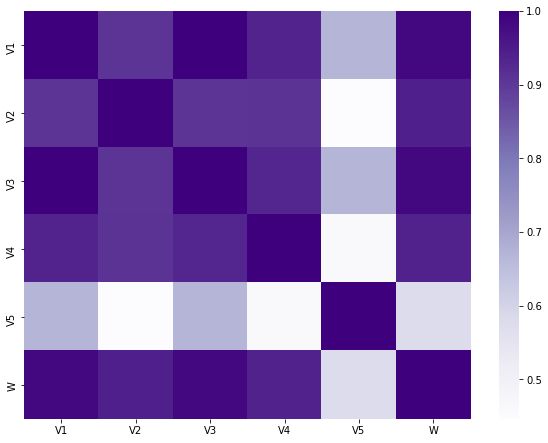

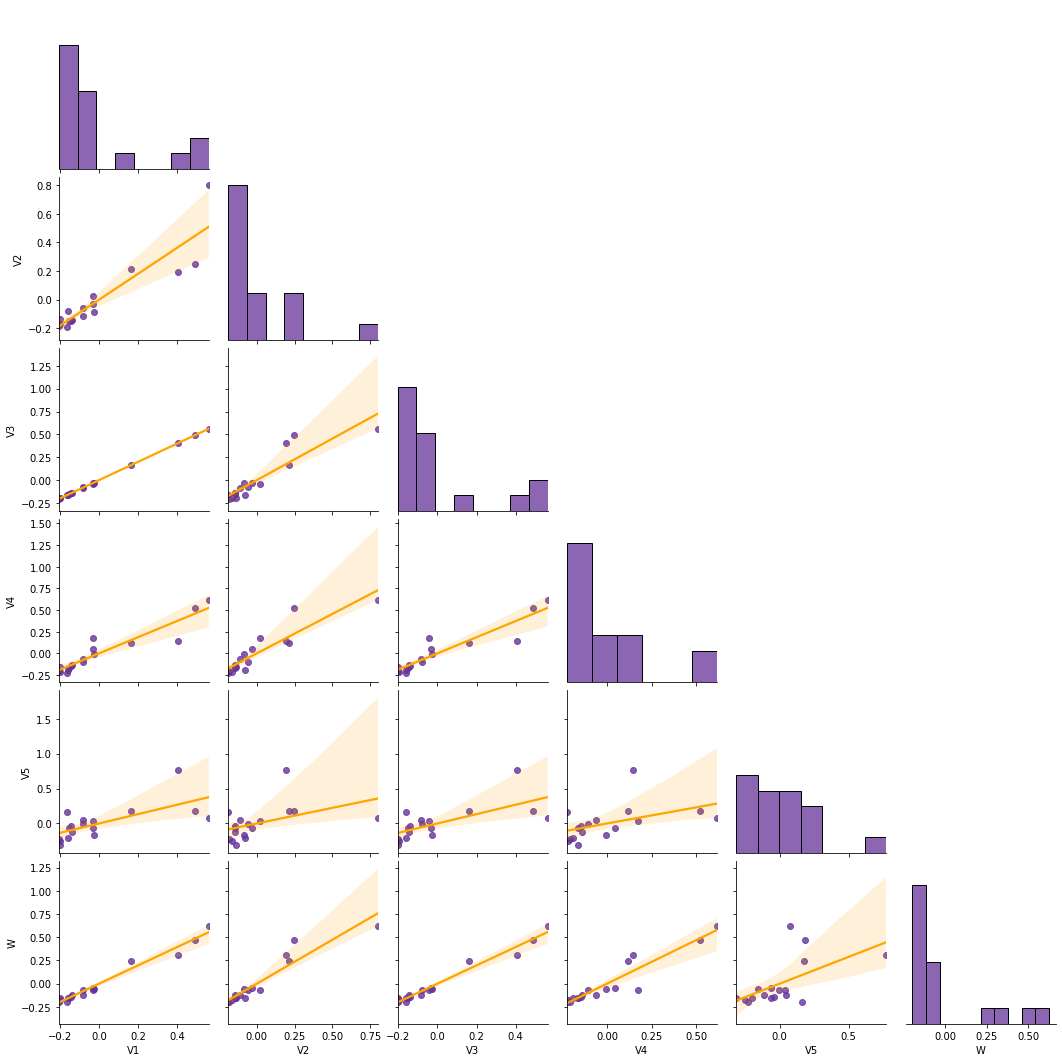

In [17]:
# inciso b)
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
import seaborn as sns


# Calculo del parámetro de sesgo por CV
data = pd.read_csv("DatosP1T6.csv")
data=data.apply(lambda x: x-x.mean(), axis=0)
data=data.apply(lambda x: x/np.linalg.norm(x),axis=0)
data.reset_index(drop=True)


corr_matrix = data.corr()

X_train=data.drop('W',axis=1)
y_train=data['W']


plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix, cmap='Purples')

sns.pairplot(data, kind="reg", corner = True,
    plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color': 'rebeccapurple'}},
    diag_kws={'color': 'rebeccapurple'})



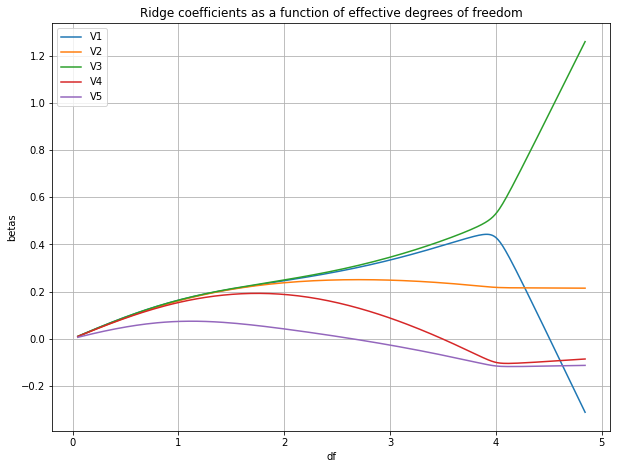

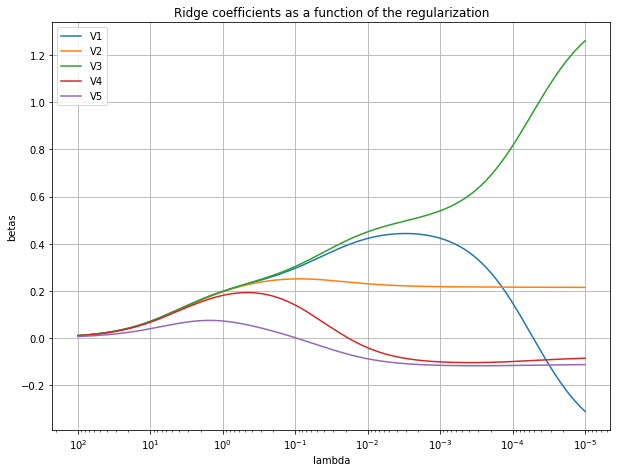

In [18]:
# Traza de Ridge

# SVD
u, d, vh = np.linalg.svd(X_train, full_matrices=True)
np.round(d**2,2) # Redondeo

n_lambdas = 200
lambdas = np.logspace(-5, 2, n_lambdas)
df_l = []
coefs = []

for l in lambdas:
    df_l.append(sum(d**2/(d**2+l)))
    ridge = Ridge(alpha=l,fit_intercept=False).fit(X_train, y_train)
    coefs.append(ridge.coef_)

fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(df_l, coefs)
ax.set_xlabel('df')
ax.set_ylabel('betas')
ax.set_title('Ridge coefficients as a function of effective degrees of freedom')
ax.grid(True)
plt.legend(X_train.columns)

fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # decreasing time
ax.set_xlabel('lambda')
ax.set_ylabel('betas')
ax.set_title('Ridge coefficients as a function of the regularization')
ax.grid(True)
plt.legend(X_train.columns)

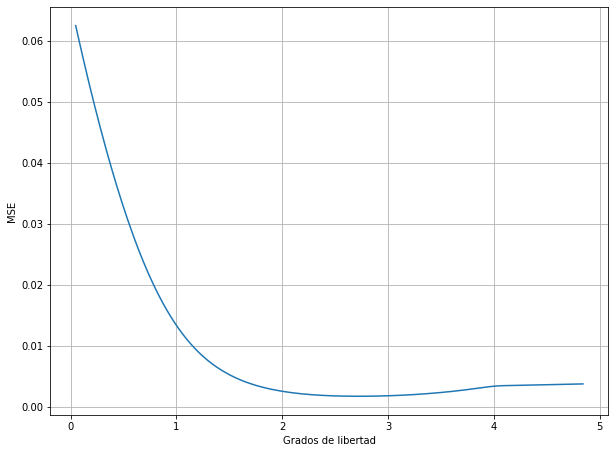

Lambda_CV:
0.08703591361485166


In [21]:
lambdas = np.logspace(-5, 2, n_lambdas)
n_repeats = 1
n_splits = X_cor.shape[0]
kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=None)

MSE_per_lambda_and_K_fold = np.zeros((n_repeats*n_splits, n_lambdas))

for i, index in enumerate(kf.split(X_train)):
    train_index, valid_index = index
    X_Kfold, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_Kfold, y_valid = y_train[train_index], y_train[valid_index]

    for j, l in enumerate(lambdas):
        ridge = Ridge(alpha=l,fit_intercept=True).fit(X_Kfold, y_Kfold)
        hat_y_valid = ridge.predict(X_valid)
        MSE_per_lambda_and_K_fold[i,j] = mean_squared_error(y_valid, hat_y_valid)

mean_MSE = MSE_per_lambda_and_K_fold.mean(axis=0)

plt.figure(figsize=(10,7.5))
plt.plot(df_l, mean_MSE)
plt.xlabel('Grados de libertad')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


hat_lambda_CV = lambdas[np.argmin(mean_MSE)]
print('Lambda_CV:')
print(hat_lambda_CV)


In [22]:
# inciso c) 
def z(lamb,X):
    diag=lamb*np.ones(X.shape[1])
    value= np.diag(np.ones(X.shape[1]))-lamb*np.linalg.inv(X.T@X+diag)
    return value

# Estimacion para el parámetro de sesgo Hoerl (1975)
model_ridge_P1_Hoerl = Ridge(alpha=hat_lambda_Hoerl,fit_intercept=False).fit(X_train,y_train)
hat_y_Hoerl = model_ridge_P1_Hoerl.predict(X_train)
MSE_Hoerl = mean_squared_error(y_train, hat_y_Hoerl)

print('Parametros Ridge Problema 1 (Hoerl):')
print(model_ridge_P1_Hoerl.coef_)

print('\n Error cuadrático medio Problema 1 (Hoerl):')
print(MSE_Hoerl)

Parametros Ridge Problema 1 (Hoerl):
[ 0.43805  0.21846  0.51643 -0.09722 -0.1144 ]

 Error cuadrático medio Problema 1 (Hoerl):
0.0005454489804574622


In [23]:
# Estimacion para el parámetro de sesgo CV (LOO)
model_ridge_P1_CV= Ridge(alpha=hat_lambda_CV,fit_intercept=False).fit(X_train,y_train)
hat_y_CV = model_ridge_P1_CV.predict(X_train)
MSE_CV = mean_squared_error(y_train, hat_y_CV)


print('Parametros Ridge Problema 1 (CV):')
print(model_ridge_P1_CV.coef_)

print('\n Error cuadrático medio Problema 1 (CV):')
print(MSE_CV)


Parametros Ridge Problema 1 (CV):
[ 0.30317  0.25043  0.31154  0.1291  -0.00515]

 Error cuadrático medio Problema 1 (CV):
0.0009131752436166806


In [24]:
# Otro método para usar CV y Ridge

model_ridge_P1_Auto_CV = RidgeCV(alphas=lambdas,fit_intercept=False).fit(X_train, y_train)
R2_ridge=model_ridge_P1_Auto_CV.score(X_train,y_train)
print('Lambda CV_Auto')
print(model_ridge_P1_Auto_CV.alpha_)
print('\nParametros Ridge Problema 1 (CV Auto)')
print(model_ridge_P1_Auto_CV.coef_)
print('\nR2 Problema 1 (CV Auto)')
print(R2_ridge)



Lambda CV_Auto
0.07401959996915644

Parametros Ridge Problema 1 (CV Auto)
[ 0.31255  0.25021  0.32196  0.11663 -0.01212]

R2 Problema 1 (CV Auto)
0.9852238700795798


 Observamos que en MSE el $\lambda_{CV}$ no difiere tanto del $\lambda_H$, pero al estar optimizando en un espacio parametral muy grande cuando elegimos $\lambda_H$ el $\lambda_{CV}$ es mejor opción pues con la estimación del error controlamos algún sobre ajuste, además el buen desempeño de $\lambda_H$ en el MSE se debe que al ser considerablemente más pequeño es menos sesgada la estimación de los parámetros, y es así de pequeño dado que por el propio problema de multicolinealidad $\beta'\beta\gg 0$, entonces $\lambda_H$ no es una buena opción debido a que en realidad no estamos haciendo una reestricción considerable a las covariables para resolver el problema de multicolinealidad 

### Comparamos el modelo del Problema 1 e) con el modelo Ridge con el parámetro de sesgo ajustado por CV. La forma en la que comparamos es haciendo LOO-CV en cada modelo y estimado el Error Cuadrático Medio, para al final comparar los promedios de los errores que se cometen###

In [25]:
# inciso e) 

# Validación de los modelos en Problema 1 y Problema 3 por CV
n_lambdas=1
n_repeats = 10
n_splits = X_cor.shape[0]
kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=None)

MSE_lambda_CV_K_fold = np.zeros((n_repeats*n_splits, n_lambdas))
MSE_model1_P1_K_fold = np.zeros((n_repeats*n_splits, n_lambdas))

for i, index in enumerate(kf.split(X_train)):
    train_index, valid_index = index
    X_Kfold, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_Kfold, y_valid = y_train[train_index], y_train[valid_index]

    #X_Kfold=X_Kfold.apply(lambda x: x-x.mean(), axis=0)
    #y_Kfold=y_Kfold-np.mean(y_Kfold)

    X_model1_Kfold=X_Kfold.drop(['V1','V2','V4'],axis=1)
    X_model1_Kfold.insert(0, 'inter', np.ones(X_model1_Kfold.shape[0]), True)
    X_model1_valid=X_valid.drop(['V1','V2','V4'],axis=1)
    X_model1_valid.insert(0, 'inter', np.ones(X_model1_valid.shape[0]), True)

    ridge_P1=Ridge(alpha=hat_lambda_CV,fit_intercept=True).fit(X_Kfold,y_Kfold)
    model_P1=sm.OLS(y_Kfold,X_model1_Kfold).fit()

    hat_y_valid_ridge_P1 =ridge_P1.predict(X_valid)
    hat_y_valid_model1_P1=model_P1.predict(X_model1_valid)

    MSE_lambda_CV_K_fold[i,0] = mean_squared_error(y_valid, hat_y_valid_ridge_P1)
    MSE_model1_P1_K_fold[i,0]=mean_squared_error(y_valid,hat_y_valid_model1_P1)

mean_MSE_ridge_CV_P1 =  MSE_lambda_CV_K_fold.mean(axis=0)
mean_MSE_model1_P1=  MSE_model1_P1_K_fold.mean(axis=0)

print('Error cuadrático medio modelo Ridge_CV P1:')
print(mean_MSE_ridge_CV_P1)
print('Error cuadrático modelo [V3,V5]:')
print(mean_MSE_model1_P1)


Error cuadrático medio modelo Ridge_CV P1:
[0.00172]
Error cuadrático modelo [V3,V5]:
[0.0015]


## Problema 4 Tarea 6 Modelos Estadísticos ##

In [26]:
# inciso a)  

model2General=sm.OLS(Y_cor,X_corP2).fit()
model2General.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.975    
Dependent Variable:     y                AIC:                         -40.9521 
Date:                   2021-04-28 23:22 BIC:                         -38.6923 
No. Observations:       13               Log-Likelihood:              24.476   
Df Model:               4                F-statistic:                 125.4    
Df Residuals:           9                Prob (F-statistic):          6.94e-08 
R-squared (uncentered): 0.982            Scale:                       0.0019583
-------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|         [0.025       0.975]
-------------------------------------------------------------------------------------
x1        0.6065         0.2746        2.2090       0.0545       -0.0146       1.2276
x2        0.5277         0.7059        0.7476       0.4738       -1.0690       2.1245
x3        0.0434         0.3030        0.1432       0.8893       -0.6419       0.7287
x4       -0.1603         0.7438       -0.2155       0.8342       -1.8429       1.5223
-------------------------------------------------------------------------------
Omnibus:                    0.165            Durbin-Watson:               2.053
Prob(Omnibus):              0.921            Jarque-Bera (JB):            0.320
Skew:                       0.201            Prob(JB):                    0.852
Kurtosis:                   2.345            Condition No.:               37   
===============================================================================

"""

### Cálculo del parámetro de sesgo según Hoerl, Problema 4###

In [27]:
# Calculo del parámetro de sesgo por Hoerl (1975)

p=X_corP2.shape[1]
s2 = model2General.scale
beta = model2General.params

hat_lambda_Hoerl_P2=p*s2/(np.dot(beta,beta))
print('Lambda Hoerl:')
print(hat_lambda_Hoerl_P2)

Lambda Hoerl:
0.011623390619629512


### Usamos la función Ridge CV, que como en el ejercicio anterior da el mismo resultado para el parámetro de sesgo por CV y se tienen la misma estimación de los parámetros ###

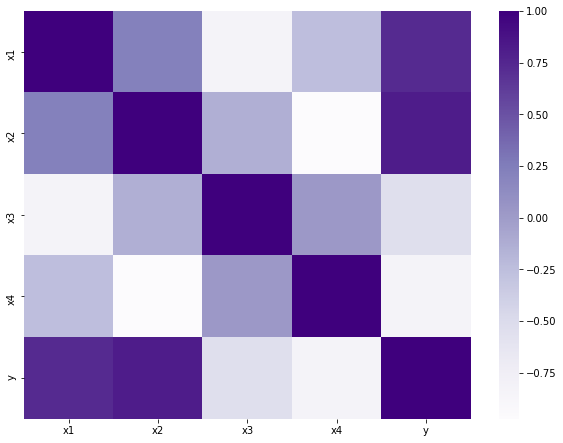

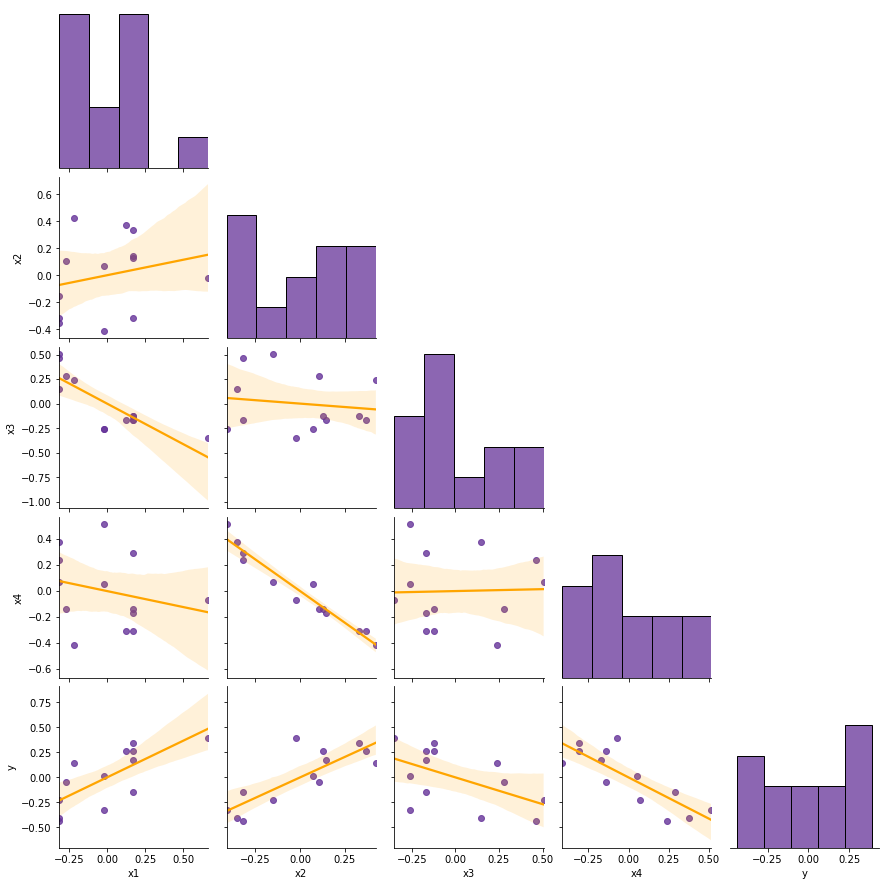

In [28]:
# Analisis de Multicolinealidad

data = pd.read_csv("DatosP2T6.csv")
data=data.apply(lambda x: x-x.mean(), axis=0)
data=data.apply(lambda x: x/np.linalg.norm(x),axis=0)

#data_center=data-data.mean()
#data_norm=data_center/np.sqrt(np.square(data_center).sum(axis=0))
corr_matrix = data.corr()

X_train=data.drop('y',axis=1)
y_train=data['y']


plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix, cmap='Purples')

sns.pairplot(data, kind="reg", corner = True,
    plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color': 'rebeccapurple'}},
    diag_kws={'color': 'rebeccapurple'})


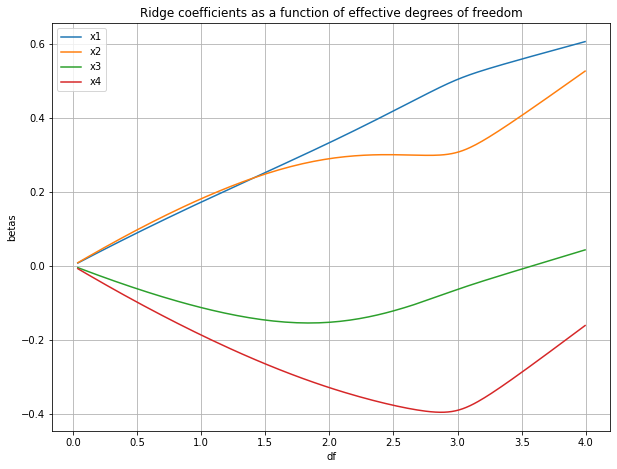

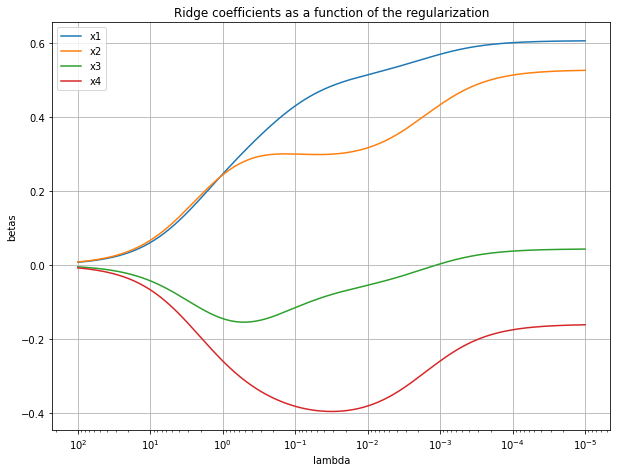

In [30]:
# Traza de Ridge

# SVD
u, d, vh = np.linalg.svd(X_train, full_matrices=True)
np.round(d**2,2) # Redondeo

n_lambdas = 200
lambdas = np.logspace(-5, 2, n_lambdas)
df_l = []
coefs = []

for l in lambdas:
    df_l.append(sum(d**2/(d**2+l)))
    ridge = Ridge(alpha=l, fit_intercept=False).fit(X_train, y_train)
    coefs.append(ridge.coef_)

fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(df_l, coefs)
ax.set_xlabel('df')
ax.set_ylabel('betas')
ax.set_title('Ridge coefficients as a function of effective degrees of freedom')
ax.grid(True)
plt.legend(X_train.columns)

fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # decreasing time
ax.set_xlabel('lambda')
ax.set_ylabel('betas')
ax.set_title('Ridge coefficients as a function of the regularization')
ax.grid(True)
plt.legend(X_train.columns)

In [31]:
# inciso b)

# Otro método para usar CV y Ridge
model_ridge_P2_Auto_CV = RidgeCV(alphas=lambdas,fit_intercept=False).fit(X_train, y_train)
R2_ridge=model_ridge_P2_Auto_CV.score(X_train,y_train)
hat_lambda_CV_P2=model_ridge_P2_Auto_CV.alpha_
print('Lambda CV_Auto')
print(hat_lambda_CV_P2)
print('\nParametros Ridge Problema 2 (CV Auto)')
print(model_ridge_P2_Auto_CV.coef_)
print('\nR2 Problema 2 (CV Auto)')
print(R2_ridge)

Lambda CV_Auto
0.010595601792776159

Parametros Ridge Problema 2 (CV Auto)
[ 0.51297  0.31512 -0.05613 -0.38309]

R2 Problema 2 (CV Auto)
0.9821209329291256


In [32]:

# inciso c) 

# Estimación Ridge por OLS
XA_H=np.block([[X_corP2],[np.diag(np.sqrt(hat_lambda_Hoerl_P2)*np.ones(p))]])
XA_CV=np.block([[X_corP2],[np.diag(np.sqrt(hat_lambda_CV_P2)*np.ones(p))]])
YA=np.concatenate((Y_cor,np.zeros(p)))

# Parámetros con lambda Hoerl
coef_Ridge_Hoerl_OLS=np.linalg.inv(XA_H.T@XA_H)@XA_H.T@YA
coef_Ridge_CV_OLS=np.linalg.inv(XA_CV.T@XA_CV)@XA_CV.T@YA

print('Parámetros regresión Ridge (Hoerl):')
print(coef_Ridge_Hoerl_OLS)
print('\n Parámetros regresión Ridge (CV):')
print(coef_Ridge_CV_OLS)


Parámetros regresión Ridge (Hoerl):
[ 0.51086  0.31285 -0.05803 -0.38534]

 Parámetros regresión Ridge (CV):
[ 0.51297  0.31512 -0.05613 -0.38309]


### Al igual que en el ejercicio anterior, la mejor elección de lambda se hace con CV, pues se evita el sobre ajuste que pueda ocasionar el optimizar en un espacio parametral más grande, lo que no se considera en la regla de Hoerl para elegir $\lambda$. En este caso ambas elecciones de $\lambda$ son parecidas y en consecuencia las estimaciones de los parámetros ###

### De manera análoga al inciso e) del problema anterior comparamos los modelos Ridge y el seleccionado en el Problema 2 f)###

In [33]:
# inciso e) 

# Validación de los modelos en Problema 1 y Problema 3 por CV
n_lambdas=1
n_repeats = 1
n_splits = X_corP2.shape[0]
kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=None)

MSE_lambda_CV_K_fold = np.zeros((n_repeats*n_splits, n_lambdas))
MSE_model_P2_K_fold = np.zeros((n_repeats*n_splits, n_lambdas))

for i, index in enumerate(kf.split(X_train)):
    train_index, valid_index = index
    X_Kfold, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_Kfold, y_valid = y_train[train_index], y_train[valid_index]

    X_model2_Kfold=X_Kfold.drop(['x3','x4'],axis=1)
    X_model2_Kfold.insert(0, 'inter', np.ones(X_model2_Kfold.shape[0]), True)
    
    X_model2_valid=X_valid.drop(['x3','x4'],axis=1)
    X_model2_valid.insert(0, 'inter', np.ones(X_model2_valid.shape[0]), True)
    
    ridge_P2=Ridge(alpha=hat_lambda_CV_P2,fit_intercept=True).fit(X_Kfold,y_Kfold)
    model_P2=sm.OLS(y_Kfold,X_model2_Kfold).fit()

    hat_y_valid_ridge_P2 =ridge_P2.predict(X_valid)
    hat_y_valid_model_P2=model_P2.predict(X_model2_valid)

    MSE_lambda_CV_K_fold[i,0] = mean_squared_error(y_valid, hat_y_valid_ridge_P2)
    MSE_model_P2_K_fold[i,0]=mean_squared_error(y_valid,hat_y_valid_model_P2)

mean_MSE_ridge_CV_P2 =  MSE_lambda_CV_K_fold.mean(axis=0)
mean_MSE_model_P2=  MSE_model_P2_K_fold.mean(axis=0)

print('Error cuadrático medio modelo Ridge_CV P2:')
print(mean_MSE_ridge_CV_P2)
print('Error cuadrático modelo [x1,x2]:')
print(mean_MSE_model_P2)

Error cuadrático medio modelo Ridge_CV P2:
[0.00263]
Error cuadrático modelo [x1,x2]:
[0.00266]
